In [170]:
from timeit import default_timer
start = default_timer()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [57]:
st = default_timer()

#Loading data
movies = pd.read_csv('../data/movies.csv')
ratings = pd.read_csv('../data/ratings.csv')
    


### 1. Movies data
- Initial Data Analysis
- Fixing data formats (seperating columns, fixing formats)
- Checking for NULL values
- Removing Null Values
- Exploratory Data Analysis

In [41]:
#Understanding the movies.csv file
print('Size of movies data set= ',movies.shape)

Size of movies data set=  (27278, 3)


In [42]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
print('\nData tyeps: \n',movies.dtypes)


Data tyeps: 
 movieId     int64
title      object
genres     object
dtype: object


#### Split title and release year in separate columns in movies dataframe

In [58]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)

movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)

#removing the year from string
movies.title = movies.title.str[:-7]
movies.head()



,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


In [59]:
print ("Number of movies Null values: ", max(movies.isnull().sum()))
movies.dropna(inplace=True)
print('New Size of movies data set= ',movies.shape)

Number of movies Null values:  22
New Size of movies data set=  (27256, 4)


In [92]:
#Seperate genres of Movies in columns
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies_genreSep = movies.join(movies.genres.str.get_dummies().astype(bool))
movies_genreSep = movies_genreSep.drop('genres', axis=1)
movies_genreSep = movies_genreSep.rename(columns={'(no genres listed)':'NoGenre'})

In [94]:
print('New size of movies data =' , movies_genreSep.shape)
movies_genreSep.head()

New shape of movies data = (27256, 23)


,movieId,title,year,NoGenre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995.0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Count of Movies per Year')

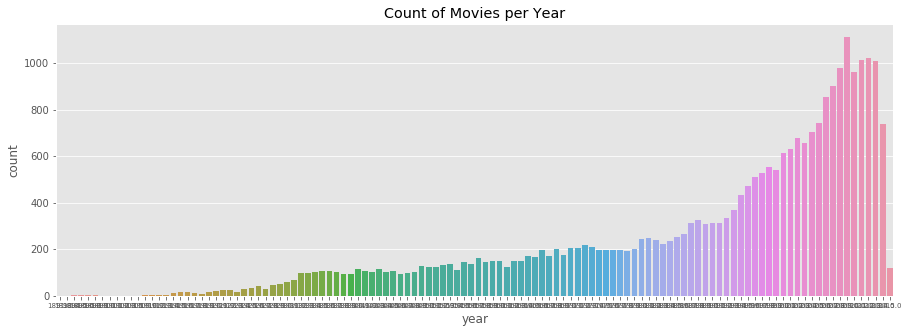

In [183]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='year', data = movies_genreSep)
plt.title('Count of Movies per Year')

In [ ]:
plt.figure(figsize=(10,5))
dftmp = movies_genreSep[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movies_genreSep[movies_genreSep[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()

#### Distributions by genre, on top of total rating distribution. This will help identifying consitent ratings or outliers (e.g. Comedies being rated higher in general).

In [156]:
temp_df=movies[['movieId', 'year']].groupby('year')


,movieId,year
12856,60684,2009.0
13033,62265,2009.0
13101,63072,2009.0
13338,65585,2009.0
13341,65601,2009.0
13358,65682,2009.0
13375,65802,2009.0
13376,65810,2009.0
13377,65813,2009.0
13384,65882,2009.0


### 2. Ratings data
- Initial Data Analysis


In [44]:
#Understanding the ratings.csv file
print("Size of ratings data set = ", ratings.shape)

Size of ratings data set =  (20000263, 4)


In [47]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [48]:
print('\nData tyeps: \n',ratings.dtypes)


Data tyeps: 
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [54]:
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))

Number of movies Null values:  0


In [55]:
pd.to_datetime(ratings.timestamp, infer_datetime_format=True)

0          1970-01-01 00:00:01.112486027
1          1970-01-01 00:00:01.112484676
2          1970-01-01 00:00:01.112484819
3          1970-01-01 00:00:01.112484727
4          1970-01-01 00:00:01.112484580
5          1970-01-01 00:00:01.094785740
6          1970-01-01 00:00:01.094785734
7          1970-01-01 00:00:01.112485573
8          1970-01-01 00:00:01.112484940
9          1970-01-01 00:00:01.112484826
10         1970-01-01 00:00:01.112484703
11         1970-01-01 00:00:01.112484767
12         1970-01-01 00:00:01.112484798
13         1970-01-01 00:00:01.094785709
14         1970-01-01 00:00:01.112485980
15         1970-01-01 00:00:01.112484603
16         1970-01-01 00:00:01.112485557
17         1970-01-01 00:00:01.112484661
18         1970-01-01 00:00:01.094785691
19         1970-01-01 00:00:01.094785621
20         1970-01-01 00:00:01.094785598
21         1970-01-01 00:00:01.112486013
22         1970-01-01 00:00:01.112485480
23         1970-01-01 00:00:01.094785665
24         1970-